In [50]:
import requests
from datetime import datetime
import json
import pandas as pd

# Test the different endpoint from the API

In [51]:
backendUrl="https://exj7xp8iog.execute-api.eu-west-3.amazonaws.com/laurent"


### Create a consumption record

In [8]:
from random import randrange
def get_consumption(device):
    return {
        "consumptionDate":datetime.now().isoformat(),
        "consumption": [randrange(10,3000) for _ in range(5)],
        "deviceNumber": device,
        "details": [randrange(100,300) for _ in range(5)]
        }

data=json.dumps(get_consumption(1))
url=f"{backendUrl}/create/consumption"
rq=requests.post(url,data)
rq.status_code

200

In [9]:
data

'{"consumptionDate": "2023-01-01T09:55:37.459270", "consumption": [1199, 702, 546, 2355, 68], "deviceNumber": 1, "details": [217, 279, 290, 232, 236]}'

### Get the consumption data from backend

In [109]:
startDate="2023-01-01"
url=f"{backendUrl}/getAll/consumption?startDate={startDate}"
message=requests.get(url).json()
len(message["data"]),max([d["consumptionDate"] for d in message["data"]])

(20, '2023-01-01T18:04:30.430783+01:00\r')

In [103]:
data=pd.DataFrame(message["data"])
data.loc[:,"kwh"]=[ sum(c) for c in data.consumption]

data.sort_values("consumptionDate").tail()

,consumptionDate,deviceType,deviceNumber,updatedAt,createdAt,consumption,SK,details,PK,id,kwh
17,2023-01-01T17:36:27.042580+01:00\r,unknown,4,2023-01-01T16:36:28.777Z,2023-01-01T16:36:28.777Z,"[0.376513, 1.428964, 0, 0, 0]",CONSUMPTION#unknown,"[1, 4, 0, 0, 0]",CONSUMPTION#64924d10-e899-4723-b690-e9b51a3fb9f4,64924d10-e899-4723-b690-e9b51a3fb9f4,1.805477
2,2023-01-01T17:39:27.845430+01:00\r,unknown,0,2023-01-01T16:39:29.189Z,2023-01-01T16:39:29.189Z,"[0, 0, 2.226197, 0, 0.224694]",CONSUMPTION#unknown,"[0, 0, 3, 0, 0]",CONSUMPTION#7e66b9ab-32f8-4b49-9b6f-7cdc352d1618,7e66b9ab-32f8-4b49-9b6f-7cdc352d1618,2.450891
8,2023-01-01T17:39:27.845430+01:00\r,unknown,4,2023-01-01T16:39:29.396Z,2023-01-01T16:39:29.396Z,"[0.397886, 0.856271, 0, 0, 0]",CONSUMPTION#unknown,"[1, 2, 0, 0, 0]",CONSUMPTION#30fc323a-2c0e-4793-a355-1d83457d6296,30fc323a-2c0e-4793-a355-1d83457d6296,1.254157
4,2023-01-01T17:59:01.051202+01:00\r,unknown,0,2023-01-01T16:59:02.820Z,2023-01-01T16:59:02.820Z,"[0, 0, 11.20111, 0, 0.224902]",CONSUMPTION#unknown,"[0, 0, 16, 0, 0]",CONSUMPTION#488e6923-ef32-41bc-95cd-9cf05ec6afb7,488e6923-ef32-41bc-95cd-9cf05ec6afb7,11.426012
12,2023-01-01T17:59:01.051202+01:00\r,unknown,4,2023-01-01T16:59:03.290Z,2023-01-01T16:59:03.290Z,"[1.282195, 1.423524, 0, 0, 0]",CONSUMPTION#unknown,"[12, 4, 0, 0, 0]",CONSUMPTION#d06e52f3-e682-4111-8e96-58067b9650de,d06e52f3-e682-4111-8e96-58067b9650de,2.705719


<AxesSubplot:xlabel='consumptionDate'>

) missing from current font.vs/diy/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


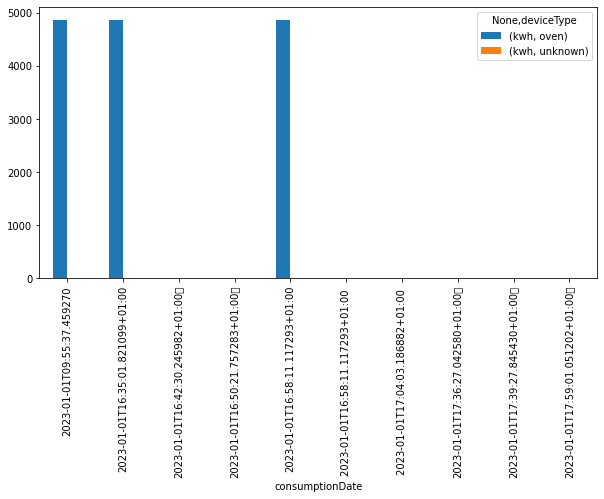

In [104]:
data.groupby(["consumptionDate","deviceType"]).agg(kwh=("kwh","sum")).unstack().fillna(0).plot.bar(figsize=(10,5))

In [105]:
data.groupby(["consumptionDate","deviceType"]).agg(kwh=("kwh","sum")).unstack()

kwh           
deviceType                            oven    unknown
consumptionDate                                      
2023-01-01T09:55:37.459270          4870.0        NaN
2023-01-01T16:35:01.821099+01:00    4870.0        NaN
2023-01-01T16:42:30.245982+01:00\r     NaN  11.696313
2023-01-01T16:50:21.757283+01:00\r     NaN   2.576453
2023-01-01T16:58:11.117293+01:00    4870.0        NaN
2023-01-01T16:58:11.117293+01:00       NaN   9.807921
2023-01-01T17:04:03.186882+01:00       NaN   3.531792
2023-01-01T17:36:27.042580+01:00\r     NaN   5.178343
2023-01-01T17:39:27.845430+01:00\r     NaN   3.705048
2023-01-01T17:59:01.051202+01:00\r     NaN  14.131731

In [106]:
import serial
from serial.tools import list_ports

In [107]:
{"consumptionDate": "2023-01-01T09:55:37.459270", "consumption": [1199, 702, 546, 2355, 68], "deviceNumber": 1, "details": [217, 279, 290, 232, 236]}'
{"consumptionDate":"2023-01-01T16:58:11.117293+01:00 ","deviceNumber":0,"consumption":[0.984873,0.363306,0,0,0.211943],"details":[11,0,0,0,0]}
{"consumptionDate":"2023-01-01T16:58:11.117293+01:00 ","deviceNumber":1,"consumption":[0.850754,0.457867,0,0.3546,0],"details":[11,0,0,0,0]}
{"consumptionDate":"2023-01-01T16:58:11.117293+01:00 ","deviceNumber":2,"consumption":[0.817416,0.45091,0,0.534481,0],"details":[11,0,0,0,0]}
{"consumptionDate":"2023-01-01T16:58:11.117293+01:00 ","deviceNumber":3,"consumption":[0.79601,0.462096,0,0.713564,0],"details":[11,0,0,0,0]}
{"consumptionDate":"2023-01-01T16:58:11.117293+01:00 ","deviceNumber":4,"consumption":[1.194518,2.074789,0,0,0],"details":[7,5,0,0,0]}
done


SyntaxError: EOL while scanning string literal (2769380755.py, line 1)

In [ ]:
for p in list_ports.grep(".*serial.*"):
    print(p)

In [ ]:
with serial.Serial('/dev/cu.usbserial-110', baudrate=115200, timeout=5) as ser:
    print(ser.name)
    ser.write((datetime.now().isoformat()+"\n").encode("utf-8"))
    ser.flush()
    for _ in range(5):
        print(ser.readline())

SerialException: [Errno 2] could not open port /dev/cu.usbserial-110: [Errno 2] No such file or directory: '/dev/cu.usbserial-110'

In [ ]:
datetime.now().isoformat()+"\n"

'2023-01-01T10:51:28.136502\n'

In [ ]:
help(serial.Serial)

Help on class Serial in module serial.serialposix:

class Serial(serial.serialutil.SerialBase, PlatformSpecific)
 |  Serial(port=None, baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, write_timeout=None, dsrdtr=False, inter_byte_timeout=None, exclusive=None, **kwargs)
 |  
 |  Serial port class POSIX implementation. Serial port configuration is
 |  done with termios and fcntl. Runs on Linux and many other Un*x like
 |  systems.
 |  
 |  Method resolution order:
 |      Serial
 |      serial.serialutil.SerialBase
 |      io.RawIOBase
 |      _io._RawIOBase
 |      io.IOBase
 |      _io._IOBase
 |      PlatformSpecific
 |      PlatformSpecificBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  cancel_read(self)
 |  
 |  cancel_write(self)
 |  
 |  close(self)
 |      Close port
 |  
 |  fileno(self)
 |      For easier use of the serial port instance with select.
 |      WARNING: this function is not portable to different platf